In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_val_score

In [2]:
# Read the data file
df = pd.read_pickle('100_fingerprints_expanded_dataset.pkl')

In [3]:
# --------------------------------------
# SECOND STAGE MODEL TRAINING
# --------------------------------------

model_list_2nd_stage = []   # For storing trained models
X_train_list_2nd_stage = [0]*5   # For storing training images, sorted by finger
X_test_list_2nd_stage = [0]*5   # For storing testing images, sorted by finger
y_train_list_2nd_stage = [0]*5   # For storing training identities, sorted by finger
y_test_list_2nd_stage = [0]*5   # For storing testing identities, sorted by finger

for i in range(0,5):
    X = list(df[df.Finger==i]["Image"])
    y = df[df.Finger==i]["Identity"]
    X_train_list_2nd_stage[i], X_test_list_2nd_stage[i], y_train_list_2nd_stage[i], y_test_list_2nd_stage[i] = train_test_split(X,y,test_size=0.2)
    model_list_2nd_stage.append(RandomForestClassifier())
    model_list_2nd_stage[i].fit(X_train_list_2nd_stage[i],y_train_list_2nd_stage[i])
    
# --------------------------------------
# END OF SECOND STAGE MODEL TRAINING
# --------------------------------------

In [33]:
type(X_train_list_2nd_stage[0])

list

In [4]:
# -------------------------------------
# FIRST STAGE MODEL TRAINING
# -------------------------------------
X_train = [item for sublist in X_train_list_2nd_stage for item in sublist]
X_test = [item for sublist in X_test_list_2nd_stage for item in sublist]
ytr = pd.concat(y_train_list_2nd_stage) # Just for accessing the index of the object
yte = pd.concat(y_test_list_2nd_stage) # Just for accessing the index of the object
y_train = [] # For storing finger
y_test = []# For storing finger

for i in range(len(ytr)):
    j = ytr.index[i]
    y_train.append([j, df["Finger"][j]])   # [index, finger]
for i in range(len(yte)):
    j = yte.index[i]
    y_test.append([j, df["Finger"][j]])   # [index, finger]

y_train_indexfree = [i[1] for i in y_train]

model_finger = RandomForestClassifier()
model_finger.fit(X_train,y_train_indexfree) # Fit the model fo training data
# -------------------------------------
# END OF FIRST STAGE MODEL TRAINING
# -------------------------------------

RandomForestClassifier()

In [36]:
ytr.index[1]

3959

In [20]:
# --------------------------------------
# MODEL IMPLEMENTATION
# --------------------------------------
pred_finger = model_finger.predict(X_test)

X_pred_list = [[]]*5  # Images sorted by predicted finger
y_pred_list = [[]]*5  # True identities sorted by predicted finger

for i in range(len(pred_finger)):
    f = pred_finger[i]
    X_pred_list[f] = X_pred_list[f] + [X_test[i]]
    n = y_test[i][0] # Index in DataFrame
    y_pred_list[f] = y_pred_list[f] + [df["Identity"][n]]
    
pred_id_list = [[]]*5

for i in range(5):
    pred_id_list[i] = model_list_2nd_stage[i].predict(X_pred_list[i])
# --------------------------------------
# END OF MODEL IMPLEMENTATION
# --------------------------------------

In [41]:
len(pred_id_list)

5

In [42]:
y_pred_list[0]

[478,
 327,
 404,
 404,
 167,
 390,
 393,
 327,
 418,
 475,
 577,
 402,
 418,
 418,
 418,
 393,
 418,
 327,
 517,
 402,
 577,
 418,
 478,
 577,
 475,
 167,
 517,
 577,
 418,
 327,
 478,
 393,
 251,
 418,
 327,
 327,
 418,
 577,
 251,
 517,
 402,
 577,
 418,
 577,
 327,
 404,
 418,
 416,
 327,
 418,
 322,
 402,
 404,
 404,
 577,
 322,
 577,
 393,
 577,
 577,
 517,
 322,
 577,
 167,
 167,
 402,
 393,
 221,
 517,
 404,
 167,
 322,
 418,
 577,
 418,
 402,
 416,
 404,
 322,
 402,
 589,
 577,
 402,
 577,
 322,
 577,
 393,
 475,
 418,
 393,
 251,
 402,
 404,
 251,
 251,
 402,
 566,
 402,
 167,
 517,
 393,
 577,
 475,
 478,
 478,
 404,
 475,
 251,
 390,
 221,
 517,
 167,
 322,
 251,
 322,
 327,
 475,
 566,
 416,
 327,
 221,
 251,
 167,
 418,
 404,
 478,
 475,
 251,
 416,
 167,
 478,
 167,
 566,
 404,
 251,
 251,
 402,
 589,
 517,
 416,
 322,
 416,
 418,
 478,
 393,
 566,
 322,
 327,
 402,
 393,
 418,
 393,
 167,
 475,
 393,
 566,
 221,
 577,
 322,
 327,
 327,
 475,
 327,
 251,
 517,
 167,
 475

In [52]:
# --------------------------------------
# EVALUATION OF RESULTS
# --------------------------------------
# Calculate accuracy
len_list = [[]]*5
score_list = [0]*5
score_tot = 0
true_id_list = []

for i in range(5):
    len_list[i] = len(pred_id_list[i])

c = 0
for i in range(5):
    siz = len_list[i]
    for j in range(siz):
#         if j<5:
#             print(pred_id_list[i][j])
#             print(df["Identity"][y_test[c][0]])
        true_id_list.append(df["Identity"][y_test[c][0]])
        if pred_id_list[i][j] == df["Identity"][y_test[c][0]]:
            score_list[i] += 1
            score_tot += 1
        c+=1
#         score_list[i] = score_list[i]/siz
    score_tot = score_tot/sum(len_list)

# Print the result
for i in range(len(score_list)):
    print(score_list[i])
print(score_tot)
# --------------------------------------
# END OF EVALUATION OF RESULTS
# --------------------------------------

0
28
0
0
0
1.75e-12


Text(33.0, 0.5, 'Truth')

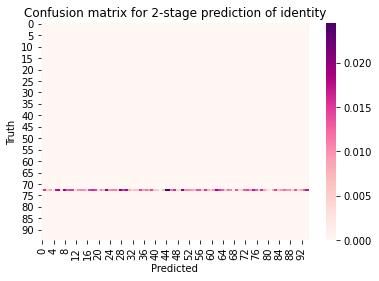

In [59]:
# Confusion matrix
cm = confusion_matrix(true_id_list, [item for sublist in pred_id_list for item in sublist], normalize='all') # Remove 'normalize="all"' to get absolute numbers
plt.figure()
sn.heatmap(cm, annot=False, cmap='RdPu')
plt.title('Confusion matrix for 2-stage prediction of identity')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
plt.show()